#RSI-INDICATOR

[*********************100%%**********************]  1 of 1 completed


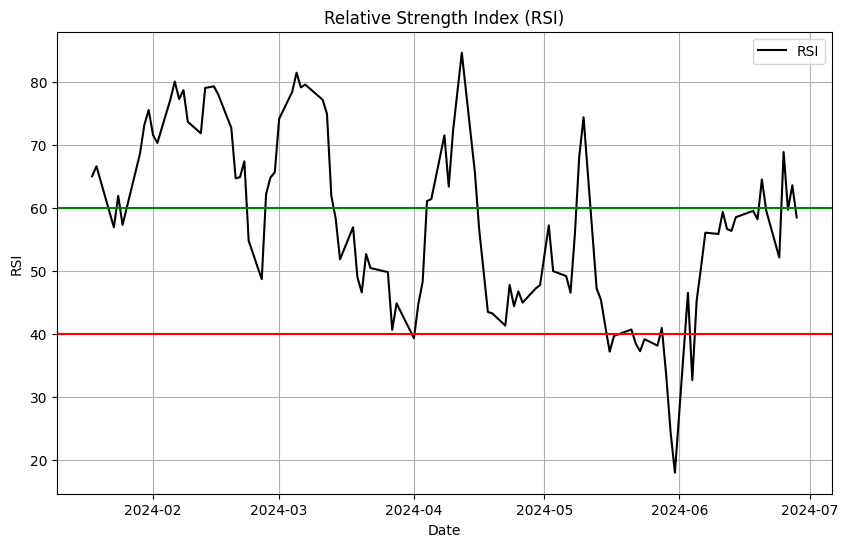

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download data
df = yf.download('TATAMOTORS.NS', start='2024-01-01')
data = pd.DataFrame(df['Close'])

# Calculate price change
data['Change'] = data['Close'].diff()

# Calculate gains and losses
data['Gain'] = np.where(data['Change'] > 0, data['Change'], 0)
data['Loss'] = np.where(data['Change'] < 0, abs(data['Change']), 0)

# Calculate average gain and average loss over a specified period (e.g., 14 days)
period = 14
data['Avg_gain'] = data['Gain'].rolling(window=period).mean()
data['Avg_loss'] = data['Loss'].rolling(window=period).mean()

# Calculate RS (Relative Strength)
data['RS'] = data['Avg_gain'] / data['Avg_loss']

# Calculate RSI
data['RSI'] = 100 - (100 / (1 + data['RS']))


# Plot RSI
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['RSI'], label='RSI', color='black')
plt.title('Relative Strength Index (RSI)')
plt.axhline(60,color='green')#Draws horizantal lines
plt.axhline(40,color='red')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend() #Adds label to plot
plt.grid()
plt.show()

